In [14]:
import pandas as pd
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv("outputs/constituencieswithresultsprocessed.csv")
df = df.dropna(axis=1)

In [3]:
drop_cols = ["ONS code", "New constituency name","Total population", "2019_Results", "2017_Results", "2015_Results", "2010_Results", "2005_Results","Cluster", "Low_Confidence_Imputation","EngReg","Scot",'2019_Resultstot','2017_Resultstot','2015_Resultstot','2010_Resultstot',  '2005_Resultslab', '2005_Resultslib', '2005_Resultsref',
       '2005_Resultsnat', '2005_Resultsoth', '2005_Resultstot',
       '2005_Resultscon_pc', '2005_Resultslab_pc', '2005_Resultslib_pc',
       '2005_Resultsref_pc', '2005_Resultsnat_pc', '2005_Resultsoth_pc','2017_Resultscon',
       '2017_Resultslab', '2017_Resultslib', '2017_Resultsref',
       '2017_Resultsnat', '2017_Resultsoth', '2017_Resultstot',
       '2017_Resultscon_pc', '2017_Resultslab_pc', '2017_Resultslib_pc',
       '2017_Resultsref_pc', '2017_Resultsnat_pc', '2017_Resultsoth_pc',
       '2015_Resultscon', '2015_Resultslab', '2015_Resultslib',
       '2015_Resultsref', '2015_Resultsnat', '2015_Resultsoth',
       '2015_Resultstot', '2015_Resultscon_pc', '2015_Resultslab_pc',
       '2015_Resultslib_pc', '2015_Resultsref_pc', '2015_Resultsnat_pc',
       '2015_Resultsoth_pc', '2010_Resultscon', '2010_Resultslab',
       '2010_Resultslib', '2010_Resultsref', '2010_Resultsnat',
       '2010_Resultsoth', '2010_Resultstot', '2010_Resultscon_pc',
       '2010_Resultslab_pc', '2010_Resultslib_pc', '2010_Resultsref_pc',
       '2010_Resultsnat_pc', '2010_Resultsoth_pc', '2005_Resultscon','2019_Resultscon', '2019_Resultslab',
       '2019_Resultslib', '2019_Resultsref', '2019_Resultsnat',
       '2019_Resultsoth']
unnamed_cols = [col for col in df.columns if "Unnamed:" in col]
for col in unnamed_cols:
    drop_cols.append(col)
print(drop_cols)
xdf = df.drop(drop_cols,axis=1)
xdf = xdf.dropna(axis=1).copy()
# xdf.fillna(xdf.mean(), inplace=True)
# X = xdf.values
# X.shape

['ONS code', 'New constituency name', 'Total population', '2019_Results', '2017_Results', '2015_Results', '2010_Results', '2005_Results', 'Cluster', 'Low_Confidence_Imputation', 'EngReg', 'Scot', '2019_Resultstot', '2017_Resultstot', '2015_Resultstot', '2010_Resultstot', '2005_Resultslab', '2005_Resultslib', '2005_Resultsref', '2005_Resultsnat', '2005_Resultsoth', '2005_Resultstot', '2005_Resultscon_pc', '2005_Resultslab_pc', '2005_Resultslib_pc', '2005_Resultsref_pc', '2005_Resultsnat_pc', '2005_Resultsoth_pc', '2017_Resultscon', '2017_Resultslab', '2017_Resultslib', '2017_Resultsref', '2017_Resultsnat', '2017_Resultsoth', '2017_Resultstot', '2017_Resultscon_pc', '2017_Resultslab_pc', '2017_Resultslib_pc', '2017_Resultsref_pc', '2017_Resultsnat_pc', '2017_Resultsoth_pc', '2015_Resultscon', '2015_Resultslab', '2015_Resultslib', '2015_Resultsref', '2015_Resultsnat', '2015_Resultsoth', '2015_Resultstot', '2015_Resultscon_pc', '2015_Resultslab_pc', '2015_Resultslib_pc', '2015_Resultsref_p

In [4]:
ohe = OneHotEncoder(sparse_output=False)
regdf = pd.DataFrame(ohe.fit_transform(pd.DataFrame(xdf.loc[:,"Region"])))
regdf.shape

(632, 11)

In [5]:
X_df = xdf.join(regdf)
X_df = xdf.copy()
X_df = X_df.drop("Region",axis=1)

In [6]:
X = X_df.values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [7]:
X.shape

(632, 13)

In [8]:
norm_df = pd.DataFrame(X, columns=X_df.columns)

In [12]:
# Compute all the pairwise distances
all_distances = pairwise_distances(norm_df, metric='euclidean')

# Compute the distance of each point to its closest neighbor
neig_distances = [np.min(row[np.nonzero(row)]) for row in all_distances]


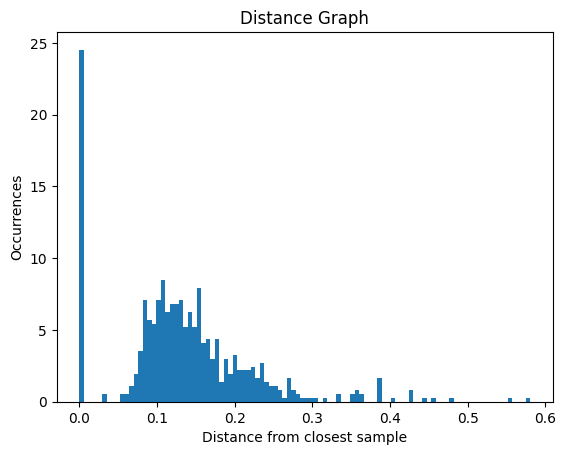

In [13]:
# Plot the distances
plt.hist(neig_distances, bins=100, density=True);
plt.xlabel('Distance from closest sample')
plt.ylabel('Occurrences')
plt.title('Distance Graph')
plt.show()

In [15]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(norm_df.iloc[:,0:17])
X_principal = pca.fit_transform(norm_df)

X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
X_principal.head()

,P1,P2
0,0.129248,-0.007188
1,-0.068765,-0.138153
2,-0.401654,-0.194065
3,0.078954,-0.043192
4,0.011869,-0.083598


In [47]:
db = DBSCAN(eps=0.3, min_samples=2)  
cluster_assignment = db.fit_predict(norm_df.iloc[:,0:13])

print(np.unique(cluster_assignment))
norm_df['labels'] = cluster_assignment


[-1  0  1  2  3  4  5  6  7  8  9]


In [48]:
norm_df["labels"].value_counts()

labels
 0    536
 6     39
-1     30
 9     10
 3      4
 5      3
 1      2
 2      2
 4      2
 7      2
 8      2
Name: count, dtype: int64

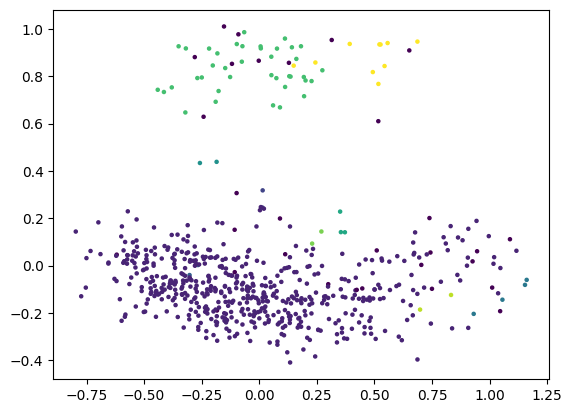

In [49]:
plt.scatter(x=X_principal['P1'], y=X_principal['P2'], c=cluster_assignment, s=5);
plt.show()

In [36]:
# WARNING this may take a couple of minutes to finish!
eps = np.linspace(0.06, 0.5, 20)
mins = np.linspace(2, 12, 11)
print(mins)
Z = np.zeros((len(eps), len(mins)))

for i, e in enumerate(eps):
    for j, m in enumerate(mins):
        db   = DBSCAN(eps=e, min_samples=int(m))
        pred = db.fit_predict(norm_df.iloc[:,0:13])
        clusters_found = len(np.unique(pred))
        Z[i,j] = clusters_found

[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


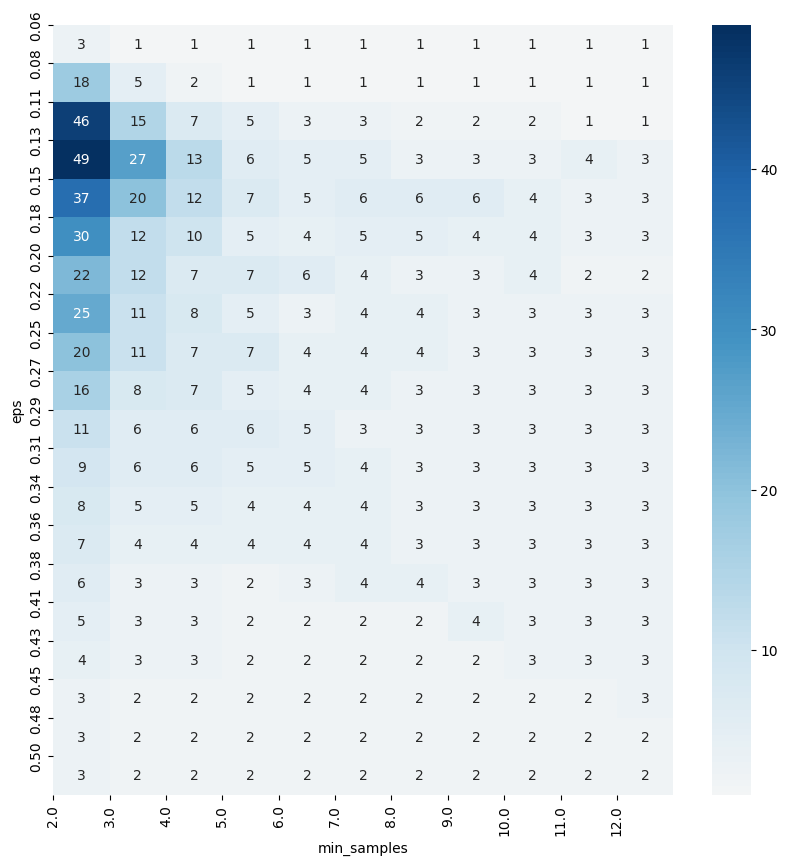

In [37]:
# Visualise this using a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(Z, cmap='RdBu', center=0, annot=True);
plt.xticks(np.arange(Z.shape[1]), mins)
plt.xticks(rotation=90)
plt.xlabel('min_samples')
plt.yticks(np.arange(Z.shape[0]), ['%0.2f' % x for x in eps])
plt.ylabel('eps');

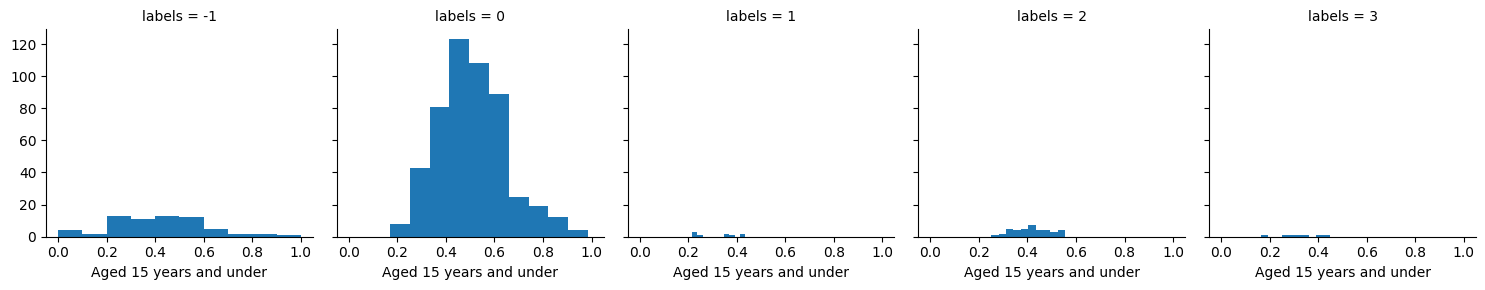

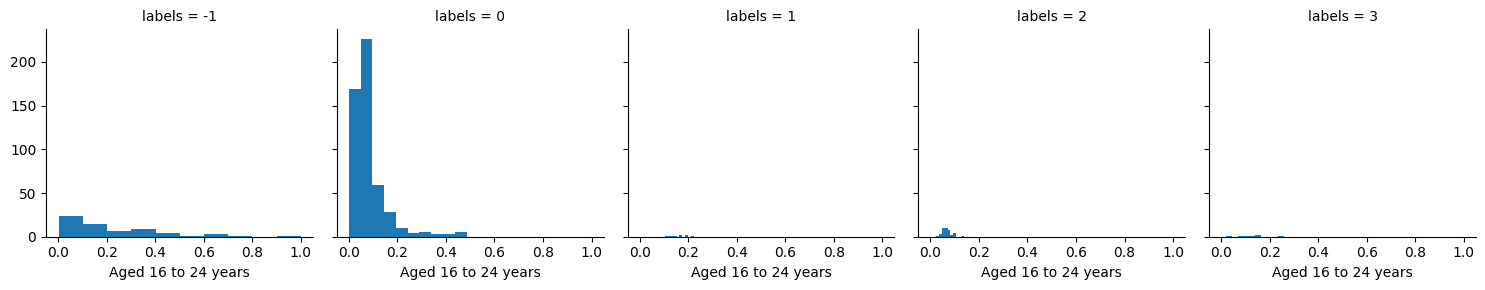

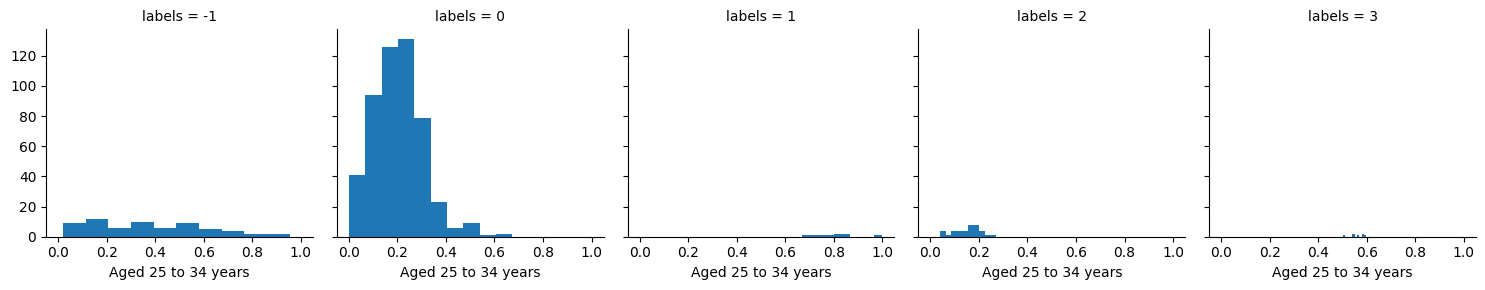

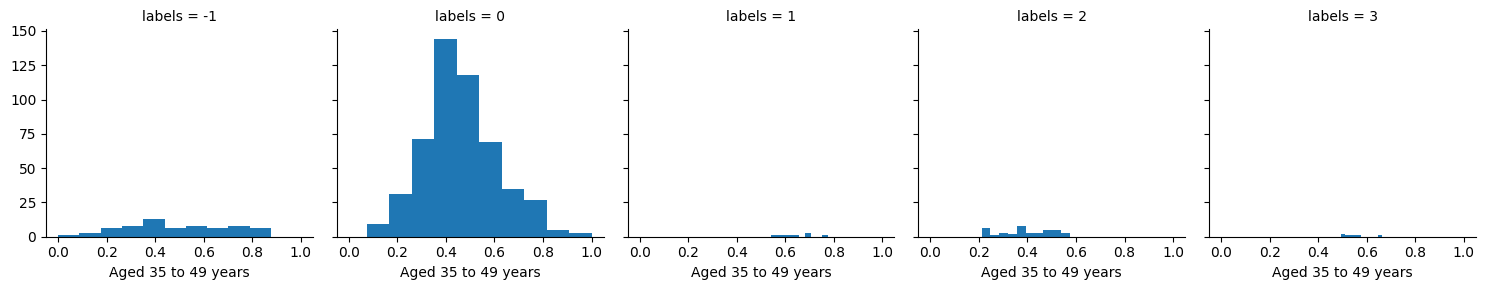

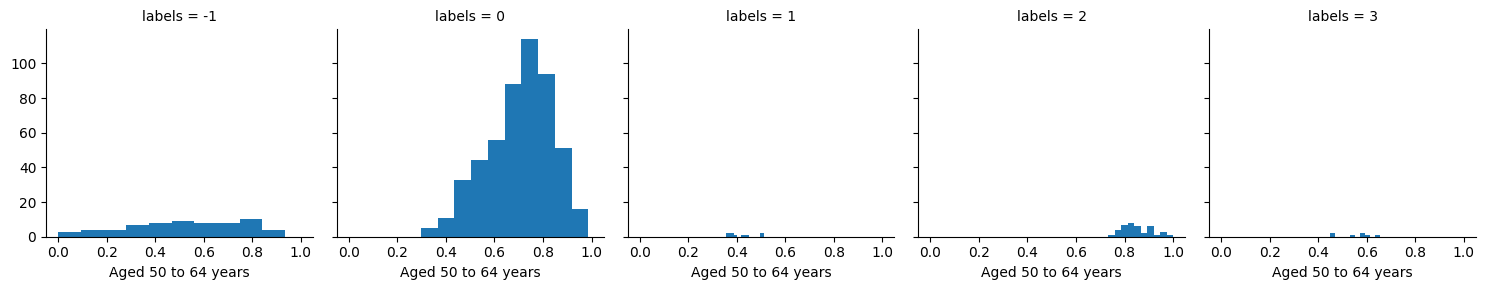

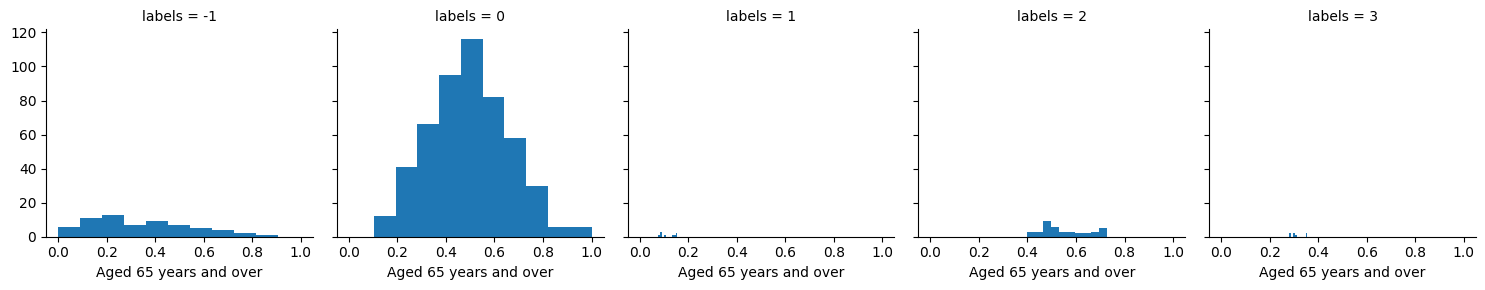

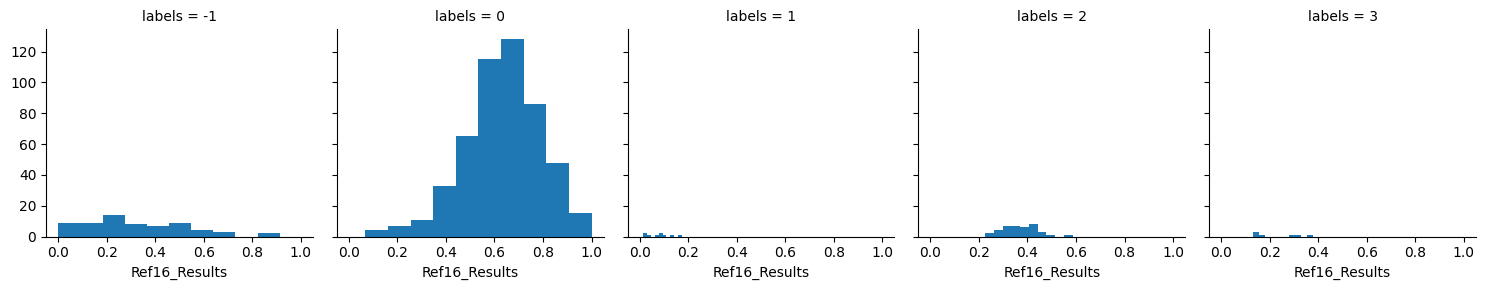

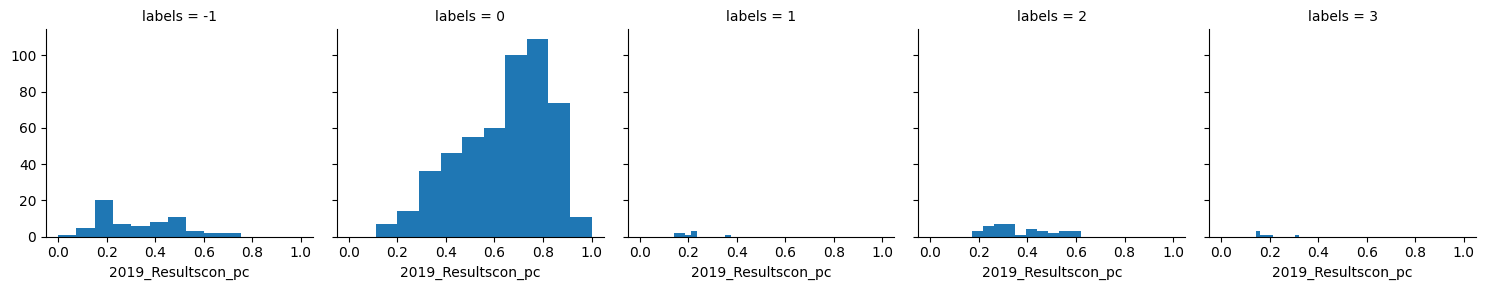

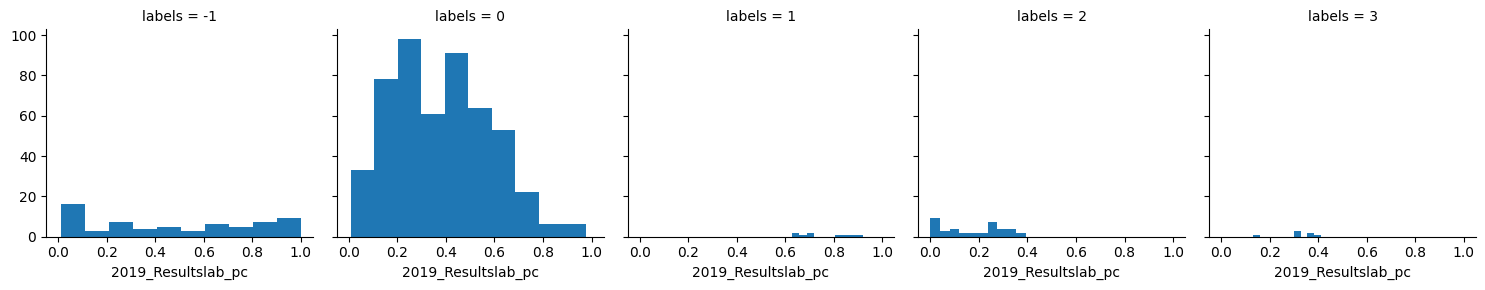

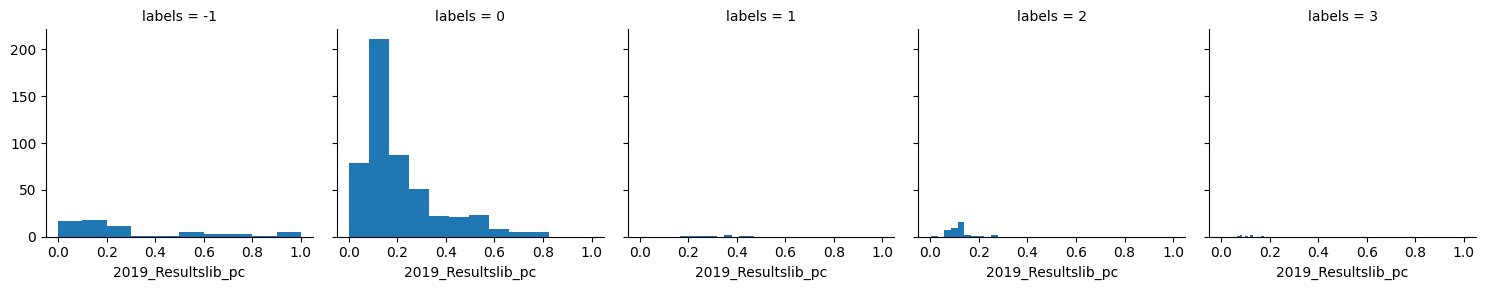

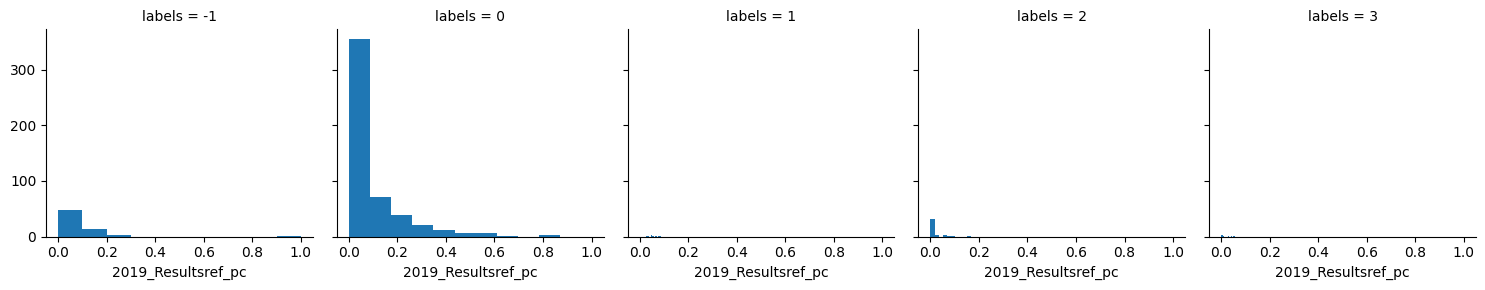

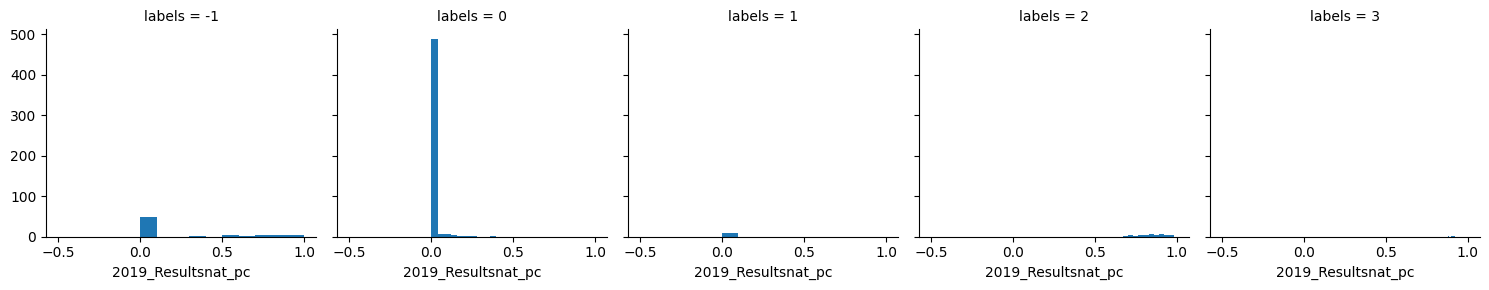

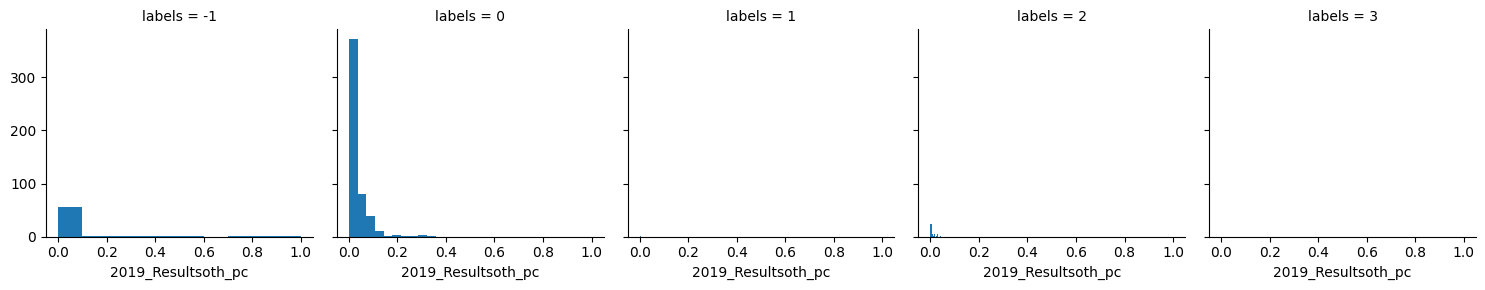

In [21]:
for c in norm_df.iloc[:,0:13]:
    grid= sns.FacetGrid(norm_df, col='labels')
    grid.map(plt.hist, c)